In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import plotly.express as px


In [2]:
df = pd.read_csv('/content/department_store_dataset.csv')
print(df.head())
print(df.info())
print(df.describe())
df['Date'] = pd.to_datetime(df['Date'])

               Seller   Department  Revenue  Revenue Goal  Margin  \
0  Letícia Nascimento  Eletrônicos  6139.41       1857.66    0.14   
1           Ana Sousa  Eletrônicos  7044.96       5236.01    0.30   
2     Gustavo Martins  Eletrônicos  4109.85       1882.47    0.14   
3      Beatriz Santos    Vestuário   315.30       2069.08    0.20   
4         Camila Lima    Vestuário  1672.33       3587.07    0.24   

   Margin Goal        Date  Sales Quantity  Customers  
0         0.18  2017-01-01              50        213  
1         0.17  2017-01-01              52        256  
2         0.20  2017-01-01              33        189  
3         0.17  2017-01-01               2          6  
4         0.14  2017-01-01              12         50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Seller          41629 non-null  object 
 1   D

In [3]:
print(df.columns)

Index(['Seller', 'Department', 'Revenue', 'Revenue Goal', 'Margin',
       'Margin Goal', 'Date', 'Sales Quantity', 'Customers'],
      dtype='object')


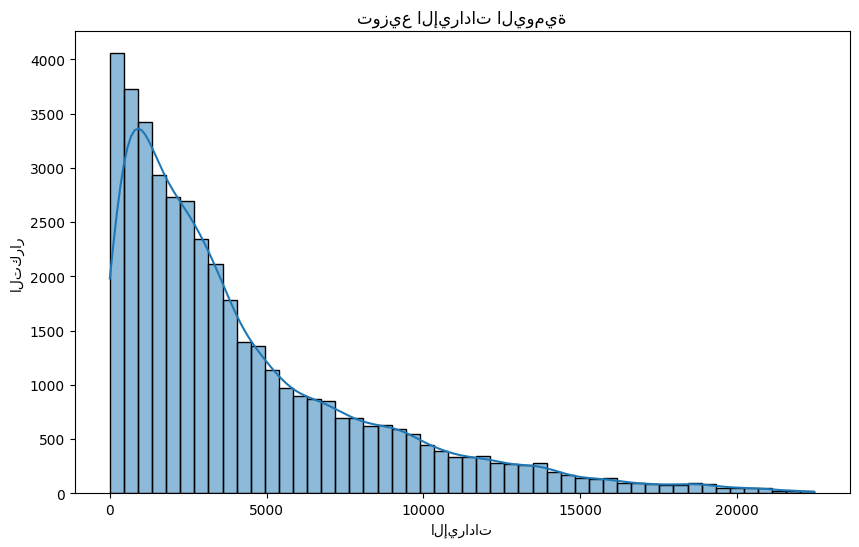

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['Revenue'], bins=50, kde=True)
plt.title('توزيع الإيرادات اليومية')
plt.xlabel('الإيرادات')
plt.ylabel('التكرار')
plt.show()


In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
# مجموع الإيرادات السنوي
annual_revenue = df.groupby('Year')['Revenue'].sum()
print("مجموع الإيرادات لكل سنة:")
print(annual_revenue)

مجموع الإيرادات لكل سنة:
Year
2017    28222941.94
2018    57718516.95
2019    38013735.47
2020    28312935.04
2021    15316938.53
2022    11607905.66
Name: Revenue, dtype: float64


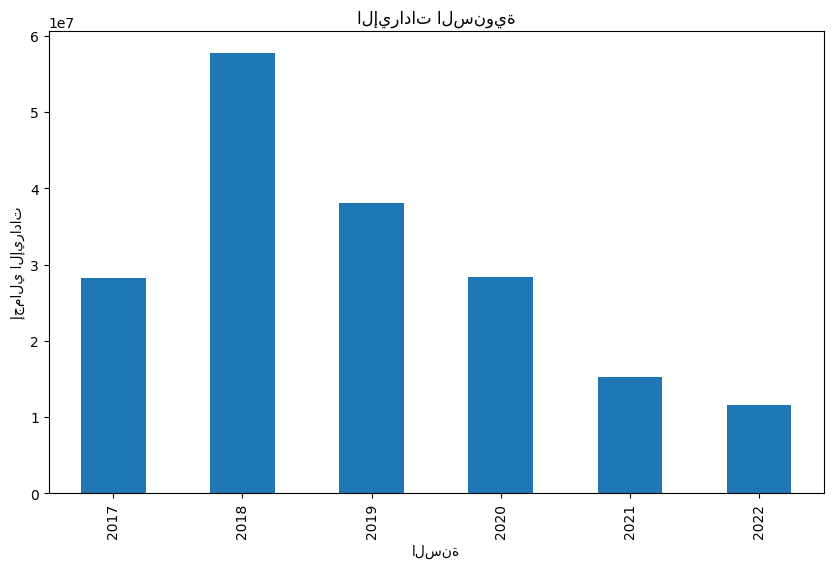

In [7]:
plt.figure(figsize=(10,6))
annual_revenue.plot(kind='bar')
plt.title('الإيرادات السنوية')
plt.xlabel('السنة')
plt.ylabel('إجمالي الإيرادات')
plt.show()

In [8]:
# مجموع الإيرادات حسب القسم Department
revenue_by_department = df.groupby('Department')['Revenue'].sum().sort_values(ascending=False)
print("إجمالي الإيرادات حسب القسم:")
print(revenue_by_department)

إجمالي الإيرادات حسب القسم:
Department
Eletrônicos    44582871.70
Casa           38997902.01
Esportes       36432027.53
Vestuário      25311061.11
Brinquedo      18915422.00
Acessórios      8535634.26
Papelaria       6418054.98
Name: Revenue, dtype: float64


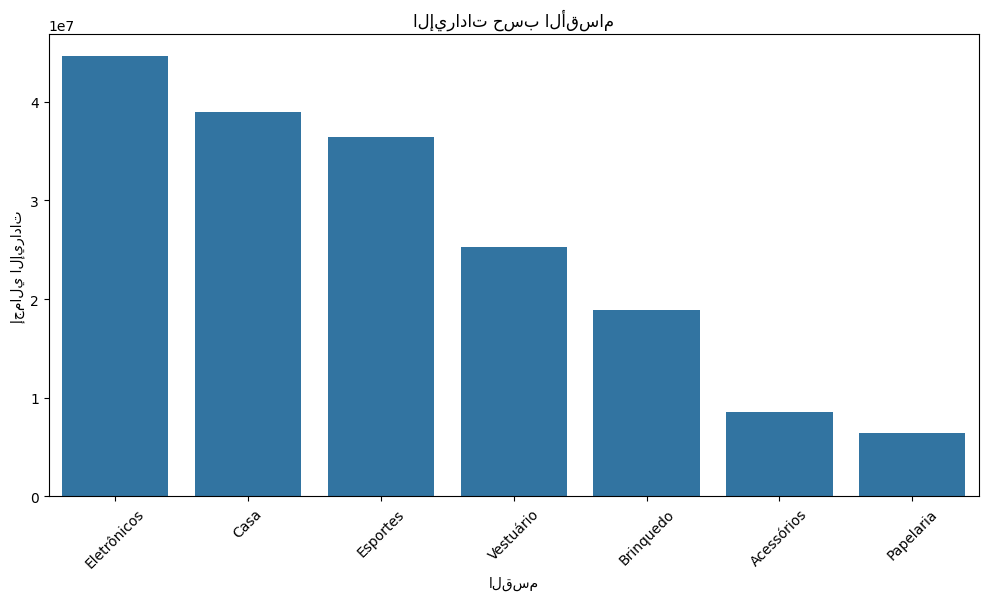

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_department.index, y=revenue_by_department.values)
plt.title('الإيرادات حسب الأقسام')
plt.xlabel('القسم')
plt.ylabel('إجمالي الإيرادات')
plt.xticks(rotation=45)
plt.show()

In [10]:
# متوسط الهامش (Margin) حسب القسم
margin_by_department = df.groupby('Department')['Margin'].mean().sort_values(ascending=False)
print("متوسط الهامش حسب القسم:")
print(margin_by_department)

متوسط الهامش حسب القسم:
Department
Acessórios     0.483279
Papelaria      0.426660
Esportes       0.312519
Casa           0.264366
Brinquedo      0.240312
Eletrônicos    0.192380
Vestuário      0.167816
Name: Margin, dtype: float64


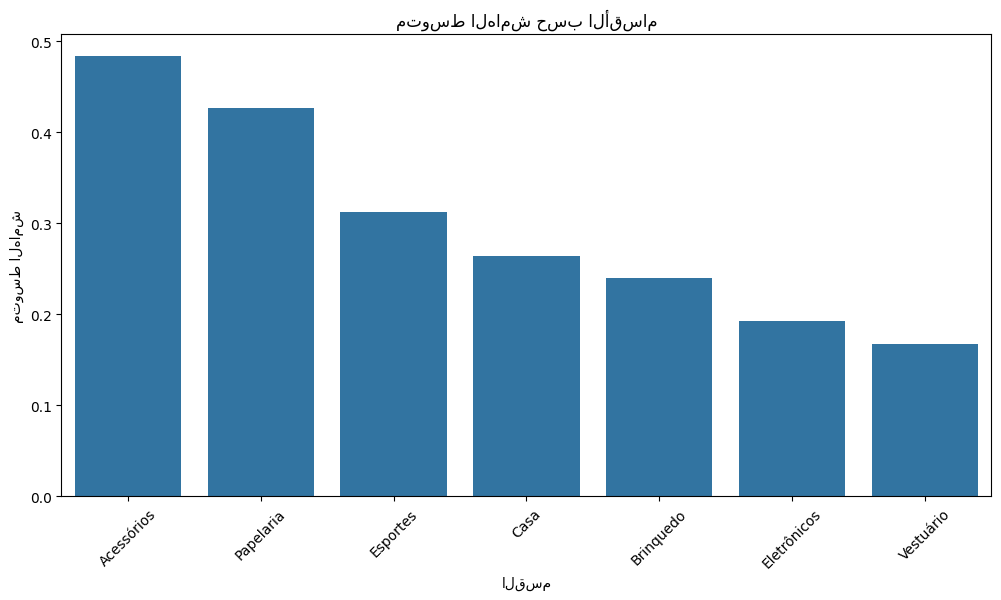

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=margin_by_department.index, y=margin_by_department.values)
plt.title('متوسط الهامش حسب الأقسام')
plt.xlabel('القسم')
plt.ylabel('متوسط الهامش')
plt.xticks(rotation=45)
plt.show()

In [12]:
# تحليل الكمية المباعة (Sales Quantity) حسب القسم
quantity_by_department = df.groupby('Department')['Sales Quantity'].sum().sort_values(ascending=False)
print("إجمالي الكمية المباعة حسب القسم:")
print(quantity_by_department)

إجمالي الكمية المباعة حسب القسم:
Department
Eletrônicos    349304
Casa           313553
Esportes       288992
Vestuário      188493
Brinquedo      141508
Acessórios      61668
Papelaria       45598
Name: Sales Quantity, dtype: int64


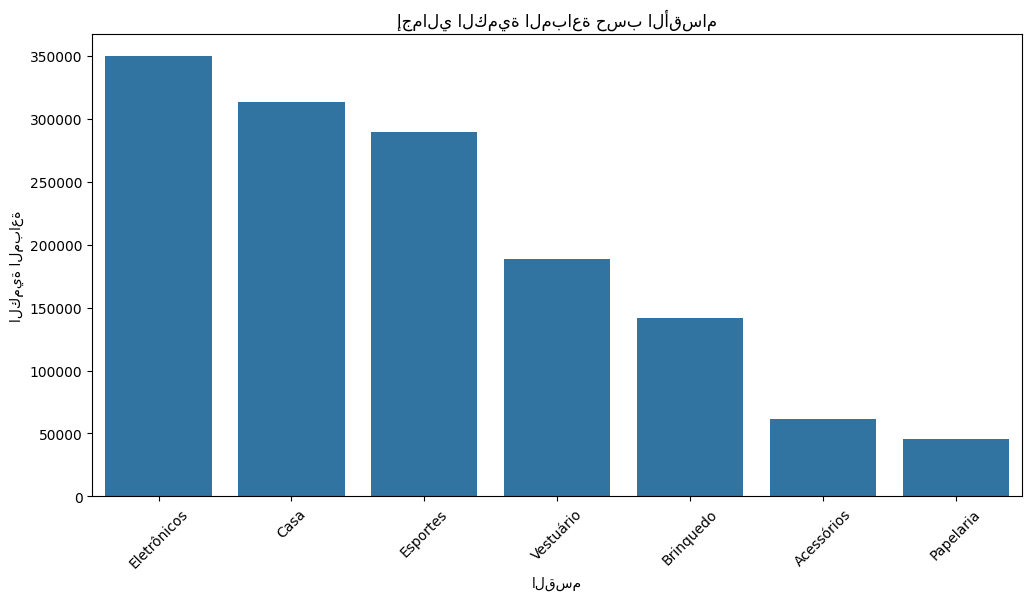

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=quantity_by_department.index, y=quantity_by_department.values)
plt.title('إجمالي الكمية المباعة حسب الأقسام')
plt.xlabel('القسم')
plt.ylabel('الكمية المباعة')
plt.xticks(rotation=45)
plt.show()

Mean Squared Error (MSE): 11715450.84
Mean Absolute Error (MAE): 2353.03
R^2 Score: 0.33


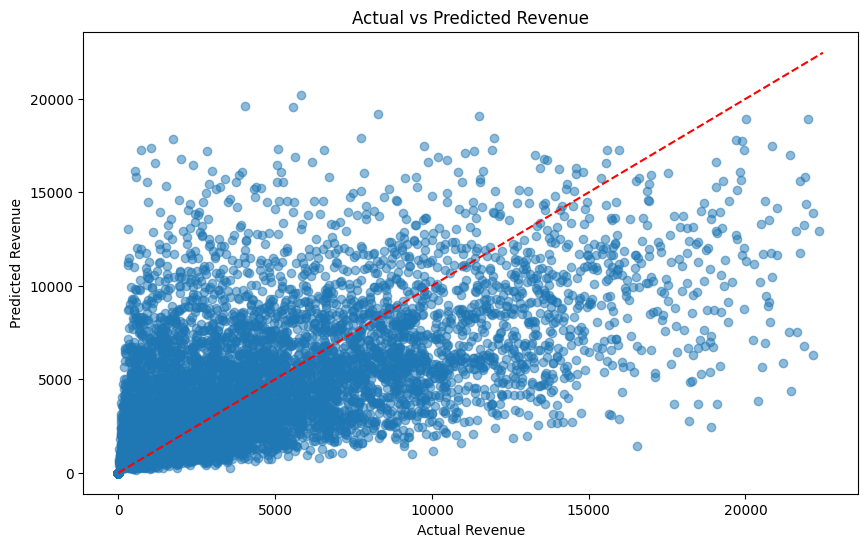

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# إضافة ميزات من التاريخ
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# نحتاج لتحويل 'Department' إلى أرقام باستخدام encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# اختر الخصائص التي سنستخدمها للتنبؤ (features)
features = ['Year', 'Month', 'Day', 'DayOfWeek'] + [col for col in df.columns if 'Department_' in col]

X = df[features]
y = df['Revenue']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# بناء النموذج
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# رسم النتائج
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()
